<a href="https://colab.research.google.com/github/maximpopchenko/mlcourse.ai/blob/master/%D0%98%D0%9D%D0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Первая нейронная сеть на Keras

<img src='https://media.giphy.com/media/7HAm2aWDviqeQ/giphy.gif'>

Сегодня обсудим:
1. Как создать нейронную сеть в Keras
2. Как обучить нейронную сеть в Keras


И сегодня обучим три нейронные сети для решения задач:
1. Нейрон для умножения
2. Нейросеть для сложения
3. Нейросеть для классификации изображений

Давайте создадим нейронную сеть, состоящую из одного нейрона.


<img src='https://drive.google.com/uc?id=1Qx71h2FmXS6uKHmhcIKtp49G5nqMncWK'>

- `Sequential` - это класс последовательности слоев в нейронной сети, у нас пока будет только один слой, но сюда можно добавлять сколь угодно слоев и это будет сеть, состоящая из последовательности слоев.
- `Dense` - это класс полносвязного/линейного слоя, все нейроны связаны друг с другом.
- `units=1` - это количество нейронов в слое. У нас 1 нейрон.
- `input_shape=(1,)` - это входная размерность объекта. У нас только 1 вход.
- `activation='relu'` - это функция активации, которая добавляет в слой нелинейности, именно из-за неё мы можем получать более сложные результаты работы сети.

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential([
    Dense(1, input_shape=(1,), activation='relu')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.get_weights()

[array([[0.6265961]], dtype=float32), array([0.], dtype=float32)]

Инициализация весов всегда разная, если её не зафиксировать:



```
# for reproducible weights initialization
import tensorflow as tf
tf.random.set_seed(1)
```



In [ ]:
import tensorflow as tf
tf.random.set_seed(1)

model = Sequential([
    Dense(1, input_shape=(1,), activation='relu')
])

model.get_weights()

[array([[-1.1600207]], dtype=float32), array([0.], dtype=float32)]

## Нейрон для умножения на 3

Создадим обучающие данные

In [ ]:
import numpy as np

X = np.array([[1], [3], [2], [10], [4], [7], [8]])
y = np.array([[3, 9, 6, 30, 12, 21, 24]]).T

Для того, что обучить нейронную сеть для любой задачи нужно ответить на три вопроса:
1. Какая архитектура сети?
2. Что оптимизируем?
3. Как обучаем?

### Какая архитектура сети

Создадим сеть, она очень простая, состоит из одного слоя и одного нейрона.

<img src='https://drive.google.com/uc?id=1Qx71h2FmXS6uKHmhcIKtp49G5nqMncWK'>

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential([
    Dense(1, input_shape=(1,), activation='linear')
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Весов у нас выходит две штуки, это вышло из-за того, что для каждого нейрона в линейном слое есть отклонение (bias). На самом деле один нейрон в линейном слое - это линейная регрессия, поэтому если хотите чуть лучше понимать устройство одного нейрона советую посмотреть это [видео](https://youtu.be/KJA9A1q9l7E).

<img src='https://drive.google.com/uc?id=1woqEhElyJSslX_3-4HYdziFLOoi2u2s1'>

In [ ]:
w1, w0 = model.get_weights()
w1, w0

(array([[-0.70081437]], dtype=float32), array([0.], dtype=float32))

Теперь сделаем предсказание этой моделью на одном объекте.

In [ ]:
X[:1]

array([[1]])

Предсказание получается очень далекими от истины, потому что сеть еще не знает, для чего её создали.

In [ ]:
model.predict(X[:1])

array([[-0.70081437]], dtype=float32)

In [ ]:
w1 * X[:1] + w0

array([[-0.70081437]])

In [ ]:
from keras.activations import linear
linear(w1 * X[:1] + w0)

array([[-0.70081437]])

### Что оптимизируем

У нас задача регрессии, поэтому будем брать функцию потерь для этой задачи, к примеру MSE.

Вдобавок можно взять еще и метрику, которую будем считать и понимать, обучается ли сеть.

Если хочется повспомнинать метрики для задачи регрессии, то посмотрите это [видео](https://youtu.be/vh2smjQyhp8).

<img src='https://drive.google.com/uc?id=1T2Q_-kpdKeuE7T6mdypH9lZhNvs6Wrmn'>

### Как оптимизируем

Про этот вопрос будем более подробно говорить в следующих занятиях, но пока условимся, что оптимизатор помогает ошибке быстрее уменьшаться, а значит помогает сеть быстрее обучаться.

Есть несколько видов оптимизаторов, тот же градиентный спуск - это один из методов оптимизации для нейронной сети.

In [ ]:
model.compile(optimizer='sgd', loss='mse', metrics='mae')

In [ ]:
%%time
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 513ms/step - loss: 475.4478 - mae: 18.5041
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 40.3858 - mae: 5.2869
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 3.4938 - mae: 1.4652
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 0.3648 - mae: 0.4689
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0987 - mae: 0.2890
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0754 - mae: 0.2485
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0727 - mae: 0.2358
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0718 - mae: 0.2312
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0710 - mae: 0.2290
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0702 - mae: 0.2275
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - l

Сеть обучается, ошибка падает, метрика становится лучше, всё замечательно.

Теперь проверим, а как модель работает на новых данных.

In [ ]:
user_inp1, user_inp2 = 5, -9
print(f"Проверка на новых данных: {user_inp1} {user_inp2}")
print("Предсказание нейронной сети: ")
print(model.predict(np.array([[user_inp1], [user_inp2]])))

Проверка на новых данных: 5 -9
Предсказание нейронной сети: 
[[ 15.083238]
 [-26.299545]]


Предсказания очень похожи на истину.

Еще можем посмотреть, как поменялись наши веса после обучения.

In [ ]:
nw1, nw0 = model.get_weights()
print('w1 before', w1, 'w1 after', nw1)
print('w0 before', w0, 'w0 after', nw0)

w1 before [[-0.70081437]] w1 after [[2.955913]]
w0 before [0.] w0 after [0.30367187]


И проверимся на всех обучающих данных.

In [ ]:
import pandas as pd

pd.DataFrame({
   'true': np.squeeze(y),
   'pred': np.squeeze(model.predict(X))
})

,true,pred
0,3,3.259585
1,9,9.171411
2,6,6.215498
3,30,29.862804
4,12,12.127324
5,21,20.995064
6,24,23.950977


## Сеть для сложения чисел

Создадим обучающие данные

In [ ]:
X1 = np.random.randint(1, 10, size=50)
X2 = np.random.randint(1, 10, size=50)

y = X1 + X2

In [ ]:
X = np.vstack([X1, X2]).T
X

array([[8, 1],
       [5, 9],
       [7, 5],
       [4, 9],
       [7, 5],
       [7, 4],
       [3, 7],
       [5, 4],
       [9, 7],
       [6, 8],
       [5, 3],
       [8, 6],
       [7, 3],
       [2, 5],
       [2, 4],
       [9, 5],
       [5, 3],
       [9, 9],
       [6, 8],
       [4, 5],
       [7, 3],
       [3, 5],
       [3, 6],
       [3, 3],
       [5, 7],
       [3, 1],
       [1, 3],
       [3, 4],
       [2, 4],
       [7, 5],
       [9, 6],
       [4, 2],
       [7, 9],
       [5, 8],
       [3, 9],
       [5, 8],
       [6, 1],
       [6, 1],
       [6, 3],
       [4, 2],
       [2, 7],
       [6, 7],
       [2, 5],
       [2, 7],
       [2, 2],
       [5, 1],
       [9, 4],
       [2, 3],
       [2, 3],
       [9, 6]])

In [ ]:
y = y[None]
y = y.T
y

array([[ 9],
       [14],
       [12],
       [13],
       [12],
       [11],
       [10],
       [ 9],
       [16],
       [14],
       [ 8],
       [14],
       [10],
       [ 7],
       [ 6],
       [14],
       [ 8],
       [18],
       [14],
       [ 9],
       [10],
       [ 8],
       [ 9],
       [ 6],
       [12],
       [ 4],
       [ 4],
       [ 7],
       [ 6],
       [12],
       [15],
       [ 6],
       [16],
       [13],
       [12],
       [13],
       [ 7],
       [ 7],
       [ 9],
       [ 6],
       [ 9],
       [13],
       [ 7],
       [ 9],
       [ 4],
       [ 6],
       [13],
       [ 5],
       [ 5],
       [15]])

Т.к. сети - это куча маленьких линейных регрессий, а им нужно масштабирование данных, то и для нейросетей, так же нужно масштабирование данных.

Если что поизучать StandardScaler и MinMaxScaler можно в этом [видео](https://youtu.be/XsuCOfpf8Ic)

<img src='https://drive.google.com/uc?id=17gNPTKRh1K5fABEQf_TDhHWTdJuzBEjZ'>

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_norm = mms.fit_transform(X)

Для того, что обучить нейронную сеть для любой задачи нужно ответить на три вопроса:
1. Какая архитектура сети?
2. Что оптимизируем?
3. Как обучаем?

### Какая архитектура сети

Создадим сеть посложнее, она будет состоять уже из двух слоев, чтобы быстрее обучалась. В одном слое 3 нейрона, а в выходном слое 1 нейрон.

<img src='https://drive.google.com/uc?id=1iA7xkAzoWocEW-eVzI0MqVcLXALYg_In'>

При этом пользуемся `Sequential`, т.к. у нас слои последовательные, сначала 2 входа идут в 5 нейронов, а затем выходы из этих 5 нейронов идут в один нейрон.

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
tf.random.set_seed(9)

model = Sequential([
    Dense(3, input_shape=(2,), activation='linear'),
    Dense(1, activation='linear')
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 3)                 9         
                                                                 
 dense_12 (Dense)            (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


Что здесь происходит с весами и с самой архитектурой?

Количество весов для одного нейрона равно 2, т.к. два входа поступает, а вдобавок у каждого нейрона есть 1 bias, на первом слое 3 нейрона, значит суммарно весов на первом слое будет 9.

Второй слой ждет на вход 3 сигнала, еще 1 bias.

Получаем 9 + 4 = 13 обучаемых весов.

In [ ]:
model.get_weights()

[array([[-0.07237196,  0.56556344,  0.43740094],
        [-0.5245885 ,  0.13245857, -0.5101871 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.8827321 ],
        [ 0.29002857],
        [ 0.37785316]], dtype=float32),
 array([0.], dtype=float32)]

### Что оптимизируем

Снова задача регрессии, поэтому берем функцию потерь MSE.

### Как оптимизируем

Возьмем тот же самый градиентный спуск со стохастикой.

In [ ]:
model.compile(optimizer='sgd', loss='mse', metrics='mae')

In [ ]:
%%time
model.fit(X_norm, y, epochs=200)

Epoch 1/200
2/2 [==============================] - 0s 7ms/step - loss: 99.3807 - mae: 9.3797
Epoch 2/200
2/2 [==============================] - 0s 7ms/step - loss: 75.0164 - mae: 8.0067
Epoch 3/200
2/2 [==============================] - 0s 5ms/step - loss: 47.0984 - mae: 6.1159
Epoch 4/200
2/2 [==============================] - 0s 13ms/step - loss: 21.6068 - mae: 3.8829
Epoch 5/200
2/2 [==============================] - 0s 8ms/step - loss: 7.7227 - mae: 2.1875
Epoch 6/200
2/2 [==============================] - 0s 3ms/step - loss: 3.7019 - mae: 1.6191
Epoch 7/200
2/2 [==============================] - 0s 6ms/step - loss: 3.0096 - mae: 1.5180
Epoch 8/200
2/2 [==============================] - 0s 9ms/step - loss: 2.8108 - mae: 1.4678
Epoch 9/200
2/2 [==============================] - 0s 8ms/step - loss: 2.6601 - mae: 1.4247
Epoch 10/200
2/2 [==============================] - 0s 6ms/step - loss: 2.5376 - mae: 1.3946
Epoch 11/200
2/2 [==============================] - 0s 7ms/step - loss: 2.

Сеть обучается, ошибка падает, метрика становится лучше, всё замечательно.

Теперь проверим, а как модель работает на новых данных.

In [ ]:
test_X = [[4, 2],
          [6, 2]]
test_X = mms.transform(test_X)
print("Предсказание нейронной сети: ")
print(model.predict(np.array(test_X)))

Предсказание нейронной сети: 
[[6.00076 ]
 [8.000181]]


Предсказания очень похожи на истину.

И проверимся на всех обучающих данных.

In [ ]:
import pandas as pd

pd.DataFrame({
    'x1': X[:, 0],
    'x2': X[:, 1],
    'true': np.squeeze(y),
    'pred': np.squeeze(model.predict(X_norm))
}).head(10)

,x1,x2,true,pred
0,8,1,9,8.999714
1,5,9,14,13.999690
2,7,5,12,11.999557
3,4,9,13,12.999980
4,7,5,12,11.999557
5,7,4,11,10.999668
6,3,7,10,10.000491
7,5,4,9,9.000247
8,9,7,16,15.998755
9,6,8,14,13.999512


## Сеть для классификации изображений

Подгрузим данные из стандартных датасетов из `keras`.

Датасет называется MNIST и представляет из себя черно-белые изображения 28 на 28 пикселей.

In [ ]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_train[0].shape

(28, 28)

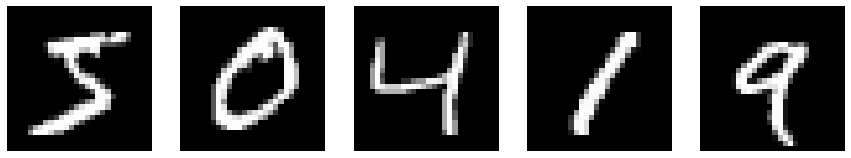

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(X_train[i], cmap='gray')
    ax[i].axis('off')

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Но давайте упростим себе задачу и возьмем для обучения только два класса, чтобы сделать задачу бинарной классификации.

In [ ]:
idxs = np.where((y_train == 0) | (y_train == 1))
y_train = y_train[idxs]

In [ ]:
X_train = X_train[idxs]

In [ ]:
X_train.shape, y_train.shape

((12665, 28, 28), (12665,))

И тоже самое для теста.

In [ ]:
idxs = np.where((y_test == 0) | (y_test == 1))
y_test = y_test[idxs]

X_test = X_test[idxs]

X_test.shape, y_test.shape

((2115, 28, 28), (2115,))

Убедимся, что теперь у нас только 0, либо 1.

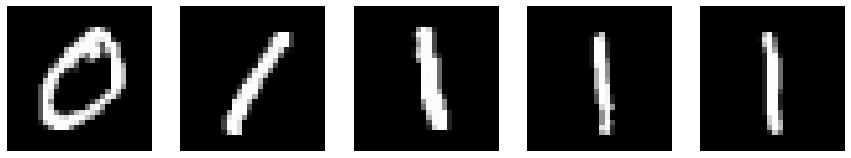

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(X_train[i], cmap='gray')
    ax[i].axis('off')

In [ ]:
y_train[:5]

array([0, 1, 1, 1, 1], dtype=uint8)

Нормируем данные, сейчас обойдемся без `MinMaxScaler` из `sklearn`, а воспользуемся делением на 255, т.к. сейчас изображения представлены пикселями в диапазоне от 0 до 255, а для нейросети комфортней обучаться на диапазоне от 0 до 1.

In [ ]:
print(X_train.min(), X_train.max())

X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.min(), X_train.max())

0 255
0.0 1.0


Так же нужно видоизменить метку класса, сейчас это лейблы 0 или 1, нужно преобразовать в бинарный вид.

Тем самым получаем 2 столбика, где первый - это метка является ли изображение 0 классом, а второй столбик - является ли изображение 1 классом.

In [ ]:
from keras.utils.np_utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

y_train[:5]

array([0, 1, 1, 1, 1], dtype=uint8)

А чтобы еще легче обучать сетку поменяем масштаб изображений, сейчас они 28 на 28, сделаем меньше, чтобы нейросеть была легче.

In [ ]:
X_train[..., np.newaxis].shape

(12665, 28, 28, 1)

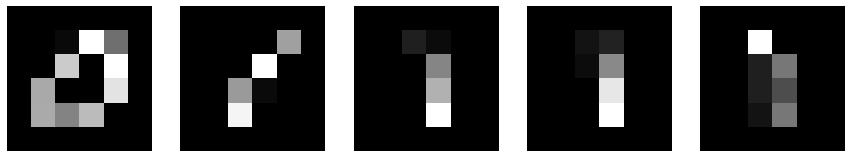

In [ ]:
import matplotlib.pyplot as plt


X_train_resized = tf.image.resize(X_train[..., np.newaxis], (6, 6))[..., 0]
X_test_resized = tf.image.resize(X_test[..., np.newaxis], (6, 6))[..., 0]

fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(X_train_resized[i], cmap='gray')
    ax[i].axis('off')

Для того, что обучить нейронную сеть для любой задачи нужно ответить на три вопроса:
1. Какая архитектура сети?
2. Что оптимизируем?
3. Как обучаем?

### Какая архитектура сети

Создадим сеть еще сложнее.

Во-первых, на вход поступает изображение 6х6, нужно с ним что-то сделать, так как наша сетку пока не умеет работать с двумерным входом. Здесь нам поможет слой из `keras` `Flatten`, который вытягивает изображение в один вектор, была картинка 6x6, а станет вектором с размерностью 36.

Была матрица:

In [ ]:
X_train_resized[0].numpy()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.03594765, 0.9888889 , 0.42941174,
        0.        ],
       [0.        , 0.00228757, 0.7885626 , 0.        , 0.9901961 ,
        0.        ],
       [0.        , 0.6558824 , 0.        , 0.        , 0.88235295,
        0.        ],
       [0.        , 0.66078436, 0.5088234 , 0.72352946, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
X_train_resized[0].numpy().shape

(6, 6)

А теперь вектор:

In [ ]:
X_train_resized[0].numpy().flatten()

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03594765, 0.9888889 ,
       0.42941174, 0.        , 0.        , 0.00228757, 0.7885626 ,
       0.        , 0.9901961 , 0.        , 0.        , 0.6558824 ,
       0.        , 0.        , 0.88235295, 0.        , 0.        ,
       0.66078436, 0.5088234 , 0.72352946, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ], dtype=float32)

In [ ]:
X_train_resized[0].numpy().flatten().shape

(36,)

Во-вторых, на выходе не что-то одно, а две вероятности быть или не быть определенным классом.

А значит на выходе имеем два нейрона, каждый из которых отвечает за класс.

<img src='https://drive.google.com/uc?id=1BQbGhOqu8rgv25QbyHe6qljE-koEm103' width=500>

В-третьих, на выходном слое нужно использовать другую функцию активации, а именно sigmoid, так как она позволяет решать задачу бинарной классификации очень хорошо.

In [ ]:
from keras.layers import Flatten
tf.random.set_seed(9)

model = Sequential([
    Flatten(input_shape=(6, 6)),
    Dense(2, activation='sigmoid')
])

model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 36)                0         
                                                                 
 dense_51 (Dense)            (None, 2)                 74        
                                                                 
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


Считаем количество весов.

Для одного нейрона - 36 входов, плюс 1 bias. Для второго нейрона тоже самое.

А значит, (36 + 1) * 2 = 74 настраиваемых весов.

### Что оптимизируем

У нас задача бинарной классификации, поэтому берем функцию потерь, которая подходит сюда.

Это к примеру, бинарная кросс-энтропия.

А еще будем считать метрику классификации accuracy, если требуется вспомнить метрики качества для классификации, то советую вам посмотреть данный [плейлист](https://youtube.com/playlist?list=PLkJJmZ1EJno6CLyvD4DHc32Fed6cPBHje).

<img src='https://drive.google.com/uc?id=19yZ9EcChO0wMe2bsGrjHS79SlkgeH3Ye'>

### Как оптимизируем

Возьмем тот же самый градиентный спуск со стохастикой.

In [ ]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics='accuracy')

In [ ]:
%%time
model.fit(X_train_resized, y_train_cat, epochs=5)

Epoch 1/5
396/396 [==============================] - 1s 2ms/step - loss: 0.6321 - accuracy: 0.8079
Epoch 2/5
396/396 [==============================] - 1s 2ms/step - loss: 0.4760 - accuracy: 0.9671
Epoch 3/5
396/396 [==============================] - 1s 2ms/step - loss: 0.3888 - accuracy: 0.9747
Epoch 4/5
396/396 [==============================] - 1s 2ms/step - loss: 0.3318 - accuracy: 0.9765
Epoch 5/5
396/396 [==============================] - 1s 2ms/step - loss: 0.2918 - accuracy: 0.9768
CPU times: user 4.08 s, sys: 215 ms, total: 4.3 s
Wall time: 5.52 s


Сеть обучается, ошибка падает, метрика становится лучше, всё замечательно.

Теперь проверим, а как модель работает на новых данных.

На выходе модель дает 2 вероятности:
1. Быть нулевым классом
2. Быть первым классом

Для выбранного объекта вероятность быть первым классом гораздо выше, чем вероятность быть нулевым классом.

In [ ]:
print("Предсказание нейронной сети: ")
pred = model.predict(X_test_resized[:1])
pred

Предсказание нейронной сети: 


array([[0.23196417, 0.779374  ]], dtype=float32)

Для того, чтобы выдать финальную метку класса можем взять класс, где максимальная предсказанная вероятность.

In [ ]:
pred_cls = pred.argmax()
pred_cls

1

Давайте проверим предсказание визуально.

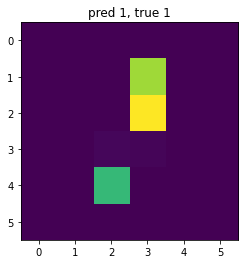

In [ ]:
idx = 0
plt.imshow(X_test_resized[idx])
plt.title(f'pred {pred_cls}, true {y_test[idx]}');

А это как выглядило изображение до изменения размера.

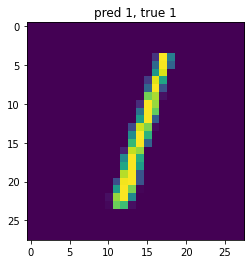

In [ ]:
plt.imshow(X_test[idx])
plt.title(f'pred {pred_cls}, true {y_test[idx]}');

И проверимся на всех обучающих данных.

Делаем предсказания на всех тестовых объектах.

In [ ]:
preds = model.predict(X_test_resized)
preds

array([[0.23196417, 0.779374  ],
       [0.87699807, 0.13391578],
       [0.2039651 , 0.8257028 ],
       ...,
       [0.23160627, 0.8456099 ],
       [0.8840015 , 0.19852799],
       [0.19147992, 0.83787894]], dtype=float32)

И берем метку класса, где максимальная вероятность.

In [ ]:
preds_cls = preds.argmax(axis=1)
preds_cls

array([1, 0, 1, ..., 1, 0, 1])

И можем посчитать метрику качества.

In [ ]:
from sklearn.metrics import accuracy_score

print(f'test acc: {accuracy_score(y_test, preds_cls)*100:.2f}% ({(y_test == preds_cls).sum()} out of {y_test.shape[0]})')

test acc: 98.25% (2078 out of 2115)


Вот так вот мы и обучили сетку на задачу классификации.

А на самом деле уже обучили целых три нейронных сети за одно занятие.

## Практика
Практика доступна на платформе boosty https://boosty.to/machine_learrrning/posts/f0bea364-3056-4c84-96d0-5586dea90d72

Доступна
1. по подписке уровня light+ и выше
2. разовая оплата


## Summary


Вот мы и разобрались, как обучается нейронная сеть с помощью `keras`.


<img src='https://media.giphy.com/media/G1ifnX4d5tYFACktp9/giphy.gif' width=300>


1. Получаем выборку для обучения
    - масштабирование данных (*MinMaxScaler, StandardScaler, /255.0*)
    - Resize данных при необходимости
    - Для классификации нужно перевести метки классов в бинарное представление  

<img src='https://media.giphy.com/media/Yj6d4OMmDV3bnYtOow/giphy.gif' width=400>

2. Создаем архитектуру
    - выбираем количество входов
    - выбираем количество слоев
    - выбираем количество выходных нейронов
    - выбираем функцию активации

<img src='https://media.giphy.com/media/4HrNRdJUZcuJjrjsnY/giphy.gif' width=300>

3. Что нужно оптимизировать
    - выбор функции потерь
    - из стандартных и привычных
        - для регрессии - *MSE*
        - для классификации - *binary_crossentropy, categorical_crossentropy*
4. Как нужно оптимизировать
    - выбор оптимизатора
    - из стандартных и привычных: *sgd, adam*


<img src='https://media.giphy.com/media/7GHKLedJKRIqEFquo7/giphy-downsized-large.gif' width=300>

5. Компиляция модели *.compile()*


6. Обучение модели *.fit()*

.

<img src='https://media.giphy.com/media/gEvab1ilmJjA82FaSV/giphy.gif' width=300>

7. Проверка результатов

**Муррр** ♥